# AI-based Surveying the Impact of Environmental, Climatic, Economic and Demographic Conditions on the Epidemic Outbreak Rate of COVID-19


$Mehryar{\,}Majd$, $Ramin{\,}Mousa$ \& $Arsalan{\,}Mousazadeh$

__Abstract:__ This study aims to have an analytical and predictive approach to the growth rate and spread of the first wave of COVID-19 infection and mainly focuses on its dependency on other global factors in affected countries via Artificial Intelligence-based processing of fatality data/statistics. Fatality, infected, and recovered cases in the form of the time-series data was acquired through the World Health Organization (WHO) & the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Recorded health data subsequently was analyzed by several Deep Neural Network (DNN) models to create a better intuition of epidemic outbreak rate of COVID-19. Monitoring spreading trend changes becomes more feasible via continuous observation of statistical pattern and integrating the other datasets with more global features count as factors influencing the local conditions on historical data conveys pivotal information concerning learning the pattern of epidemic progression. In this study, attention-based Sequence-to-Sequence (Seq2Seq) models empowered by Long-Short Term Memory (LSTM) and Gated Recurrent Unit (GRU) units, were deployed to predict mortality rate. Ultimately these analyses are utilized to monitor infection behaviour on time-series data and were subsequently assessed for their performance to predict the behaviour of the first wave of COVID-19 outbreak rate intensely. Demographic & environmental conditions have likely been influenced significantly to shape the reliable predictive learning algorithms for long-duration risk of COVID-19 pandemic.

### Data Analysis of COVID-19 for __Italy__ ![](http://flagpedia.net/data/flags/small/ir.png)  
__Attention-based Sequence-to-Sequence (Seq2Seq) model__

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from matplotlib import pyplot as plt
import os
for dirname, _, filenames in os.walk('novel-corona-virus/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


novel-corona-virus/time_series_covid_19_confirmed.csv
novel-corona-virus/COVID19_open_line_list.csv
novel-corona-virus/countries of the world.csv
novel-corona-virus/time_series_covid_19_recovered.csv
novel-corona-virus/covid_19_data.csv
novel-corona-virus/COVID19_line_list_data.csv
novel-corona-virus/time_series_covid_19_deaths.csv
novel-corona-virus/sars_2003_complete_dataset_clean.csv


In [7]:
#df_covid_19 = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv')
df_covid_19 = pd.read_csv("novel-corona-virus/covid_19_data.csv")
df_covid_19['Date'] = pd.to_datetime(df_covid_19['ObservationDate'])
df_covid_19['Outbreak'] = 'COVID_2019'
df_covid_19.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Date', 'Outbreak'],
      dtype='object')

In [8]:
df_covid_19 = df_covid_19[df_covid_19["Country/Region"]=="Iran"]

In [9]:
df_covid_19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Outbreak
1843,1844,02/19/2020,NaN,Iran,2020-02-19T23:43:02,2.0,2.0,0.0,2020-02-19,COVID_2019
1912,1913,02/20/2020,NaN,Iran,2020-02-20T17:33:02,5.0,2.0,0.0,2020-02-20,COVID_2019
1980,1981,02/21/2020,NaN,Iran,2020-02-21T18:53:02,18.0,4.0,0.0,2020-02-21,COVID_2019
2062,2063,02/22/2020,NaN,Iran,2020-02-22T10:03:05,28.0,5.0,0.0,2020-02-22,COVID_2019
2145,2146,02/23/2020,NaN,Iran,2020-02-23T15:13:15,43.0,8.0,0.0,2020-02-23,COVID_2019


# Only Coid dataset

In [12]:
df_sars_03 = pd.read_csv("novel-corona-virus/sars_2003_complete_dataset_clean.csv")
df_sars_03['Date'] = pd.to_datetime(df_sars_03['Date'])
df_sars_03['Province/State'] = None
df_sars_03['Outbreak'] = 'SARS_2003'
print(df_sars_03.columns)
df_sars_03.rename({'Cumulative number of case(s)':'Confirmed', 'Number of deaths':'Deaths', 'Number recovered':'Recovered', 'Country':'Country/Region'},axis=1,inplace=True)

Index(['Date', 'Country', 'Cumulative number of case(s)', 'Number of deaths',
       'Number recovered', 'Province/State', 'Outbreak'],
      dtype='object')


In [14]:
df_sars_03 = df_sars_03[df_sars_03["Country/Region"]=="Iran"]
df_sars_03.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Province/State,Outbreak


In [15]:
templ_cols = ['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']
df = pd.concat([df_covid_19[templ_cols], df_sars_03[templ_cols]])
df = df.reset_index(drop=True)


In [16]:
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Province/State'] = df['Province/State'].fillna('Others')
df = df.sort_values(['Country/Region','Province/State','Date'])
df.head()

,Outbreak,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
0,COVID_2019,Others,Iran,2020-02-19,2.0,2.0,0.0
1,COVID_2019,Others,Iran,2020-02-20,5.0,2.0,0.0
2,COVID_2019,Others,Iran,2020-02-21,18.0,4.0,0.0
3,COVID_2019,Others,Iran,2020-02-22,28.0,5.0,0.0
4,COVID_2019,Others,Iran,2020-02-23,43.0,8.0,0.0


In [17]:
t = df.groupby(['Outbreak','Country/Region','Province/State']).agg({'Confirmed':'max'})
t = t.loc[t['Confirmed'] >=0]
df = pd.merge(df,t[[]],left_on=['Outbreak','Country/Region','Province/State'], right_index=True)


In [18]:
df['Province/State'] = df['Province/State'].astype('category')
df['Country/Region'] = df['Country/Region'].astype('category')
df['Outbreak'] = df['Outbreak'].astype('category')
df['Province/State'] = df['Province/State'].cat.codes
df['Country/Region'] = df['Country/Region'].cat.codes
df['Outbreak'] = df['Outbreak'].cat.codes
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df.head(2)

,Outbreak,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered,Month,Week
0,0,0,0,2020-02-19,2.0,2.0,0.0,2,8
1,0,0,0,2020-02-20,5.0,2.0,0.0,2,8


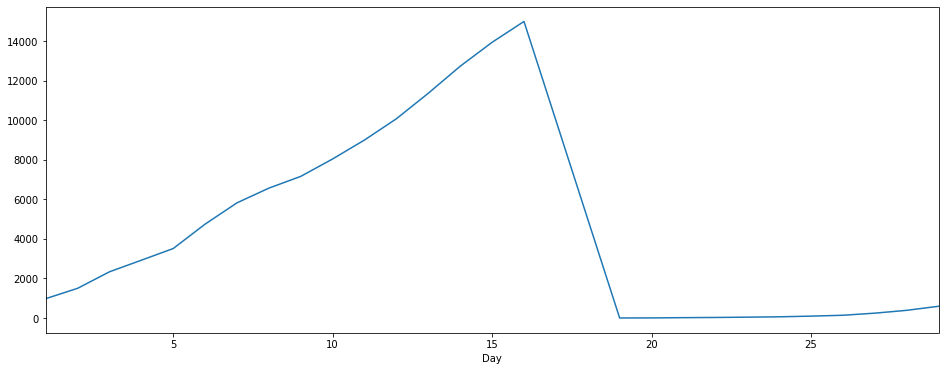

In [19]:
df['Day'] = df['Date'].apply(lambda x:x.day)
df['Hour'] = df['Date'].apply(lambda x:x.hour)
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,6))
df.groupby('Day').sum()['Confirmed'].plot()

In [20]:
df=df[[ 'Province/State', 'Country/Region', 'Day','Confirmed','Deaths','Recovered']]

In [21]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM,GRU
from keras.layers import Dense
def load_data(data, time_step=2, after_day=1, validate_percent=0.67):
    seq_length = time_step + after_day
    result = []
    for index in range(len(data) - seq_length + 1):
        result.append(data[index: index + seq_length])
    result = np.array(result)
    print('total data: ', result.shape)

    train_size = int(len(result) * validate_percent)
    train = result[:train_size, :]
    validate = result[train_size:, :]

    x_train = train[:, :time_step]
    y_train = train[:, time_step:]
    x_validate = validate[:, :time_step]
    y_validate = validate[:, time_step:]
    
     

    return [x_train, y_train, x_validate, y_validate]

Using TensorFlow backend.


In [22]:
def base_model(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    model.add(Dropout(0.50))
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.50))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    model.add(Dropout(0.50))
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(Dropout(0.50))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model

def seq2seq(feature_len=1, after_day=1, input_shape=(8, 1)):
    '''
    Encoder:
    X = Input sequence
    C = LSTM(X); The context vector

    Decoder:
    y(t) = LSTM(s(t-1), y(t-1)); where s is the hidden state of the LSTM(h and c)
    y(0) = LSTM(s0, C); C is the context vector from the encoder.
    '''

    # Encoder
    encoder_inputs = Input(shape=input_shape) # (timesteps, feature)
    encoder = LSTM(units=100,dropout=0.5 ,return_state=True,  name='encoder')
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    states = [state_h, state_c]

    # Decoder
    reshapor = Reshape((1, 100), name='reshapor')
    decoder = LSTM(units=100, dropout=0.5 ,return_sequences=True, return_state=True, name='decoder')

    # Densor
    #tdensor = TimeDistributed(Dense(units=200, activation='linear', name='time_densor'))
    densor_output = Dense(units=feature_len, activation='linear', name='output')

    inputs = reshapor(encoder_outputs)
    #inputs = tdensor(inputs)
    all_outputs = []



    for _ in range(after_day):
        outputs, h, c = decoder(inputs, initial_state=states)

        #inputs = tdensor(outputs)
        inputs = outputs
        states = [state_h, state_c]

        outputs = densor_output(outputs)
        all_outputs.append(outputs)

    decoder_outputs = Lambda(lambda x: K.concatenate(x, axis=1))(all_outputs)
    model = Model(inputs=encoder_inputs, outputs=decoder_outputs)

    return model

In [33]:
def normalize_data(data, scaler, feature_len):
    minmaxscaler = scaler.fit(data)
    normalize_data = minmaxscaler.transform(data)
    return normalize_data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=2, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (22, 6, 6)
train data:  (17, 2, 6) (17, 4, 6)
validate data:  (5, 2, 6) (5, 4, 6)


In [24]:
from keras import backend as K
from keras.models import Sequential, load_model, Model
from keras.layers import LSTM, Dense, Activation, TimeDistributed, Dropout, Lambda, RepeatVector, Input, Reshape
from keras.callbacks import ModelCheckpoint

In [25]:
 # model complie
from keras.optimizers import SGD,Adam
# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
input_shape = (2, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Instructions for updating:
Use tf.cast instead.
Train on 17 samples, validate on 5 samples
Epoch 1/100
17/17 [==============================] - 2s 120ms/step - loss: 0.0860 - acc: 0.0735 - rmse: 0.2648 - mse: 0.0860 - r_square: -0.4056 - val_loss: 0.2569 - val_acc: 0.0000e+00 - val_rmse: 0.4962 - val_mse: 0.2569 - val_r_square: -1.5106
Epoch 2/100
17/17 [==============================] - 0s 818us/step - loss: 0.0837 - acc: 0.1324 - rmse: 0.2610 - mse: 0.0837 - r_square: -0.3690 - val_loss: 0.2514 - val_acc: 0.0000e+00 - val_rmse: 0.4909 - val_mse: 0.2514 - val_r_square: -1.4570
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0802 - acc: 0.2059 - rmse: 0.2539 - mse: 0.0802 - r_square: -0.3121 - val_loss: 0.2460 - val_acc: 0.1500 - val_rmse: 0.4856 - val_mse: 0.2460 - val_r_square: -1.4040
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0774 - acc: 0.2353 - rmse: 0.2496 - mse: 0.0774 - r_square: -0.2662 - val_loss: 0.2407 - val_acc: 0

Epoch 34/100
17/17 [==============================] - 0s 994us/step - loss: 0.0381 - acc: 0.4412 - rmse: 0.1818 - mse: 0.0381 - r_square: 0.3774 - val_loss: 0.0979 - val_acc: 0.0000e+00 - val_rmse: 0.3064 - val_mse: 0.0979 - val_r_square: 0.0432
Epoch 35/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0414 - acc: 0.4412 - rmse: 0.1915 - mse: 0.0414 - r_square: 0.3227 - val_loss: 0.0957 - val_acc: 0.0000e+00 - val_rmse: 0.3030 - val_mse: 0.0957 - val_r_square: 0.0645
Epoch 36/100
17/17 [==============================] - 0s 644us/step - loss: 0.0342 - acc: 0.4412 - rmse: 0.1744 - mse: 0.0342 - r_square: 0.4402 - val_loss: 0.0933 - val_acc: 0.0000e+00 - val_rmse: 0.2991 - val_mse: 0.0933 - val_r_square: 0.0880
Epoch 37/100
17/17 [==============================] - 0s 895us/step - loss: 0.0343 - acc: 0.4559 - rmse: 0.1731 - mse: 0.0343 - r_square: 0.4391 - val_loss: 0.0906 - val_acc: 0.0000e+00 - val_rmse: 0.2947 - val_mse: 0.0906 - val_r_square: 0.1144
Epoch 38/100
17/17

Epoch 68/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0287 - acc: 0.5588 - rmse: 0.1521 - mse: 0.0287 - r_square: 0.5305 - val_loss: 0.0240 - val_acc: 0.4000 - val_rmse: 0.1449 - val_mse: 0.0240 - val_r_square: 0.7654
Epoch 69/100
17/17 [==============================] - 0s 909us/step - loss: 0.0284 - acc: 0.5588 - rmse: 0.1538 - mse: 0.0284 - r_square: 0.5357 - val_loss: 0.0243 - val_acc: 0.4000 - val_rmse: 0.1458 - val_mse: 0.0243 - val_r_square: 0.7627
Epoch 70/100
17/17 [==============================] - 0s 973us/step - loss: 0.0273 - acc: 0.6176 - rmse: 0.1496 - mse: 0.0273 - r_square: 0.5539 - val_loss: 0.0245 - val_acc: 0.4000 - val_rmse: 0.1467 - val_mse: 0.0245 - val_r_square: 0.7604
Epoch 71/100
17/17 [==============================] - 0s 716us/step - loss: 0.0267 - acc: 0.6324 - rmse: 0.1478 - mse: 0.0267 - r_square: 0.5636 - val_loss: 0.0247 - val_acc: 0.4000 - val_rmse: 0.1473 - val_mse: 0.0247 - val_r_square: 0.7585
Epoch 72/100
17/17 [==============

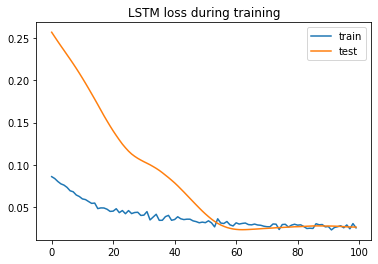

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("LSTM loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.02153190 MSE (0.14673753 RMSE ) , 60.29411756  ACC
Validation Score: 0.02619983 MSE (0.16186360 RMSE ) , 40.00000000  ACC


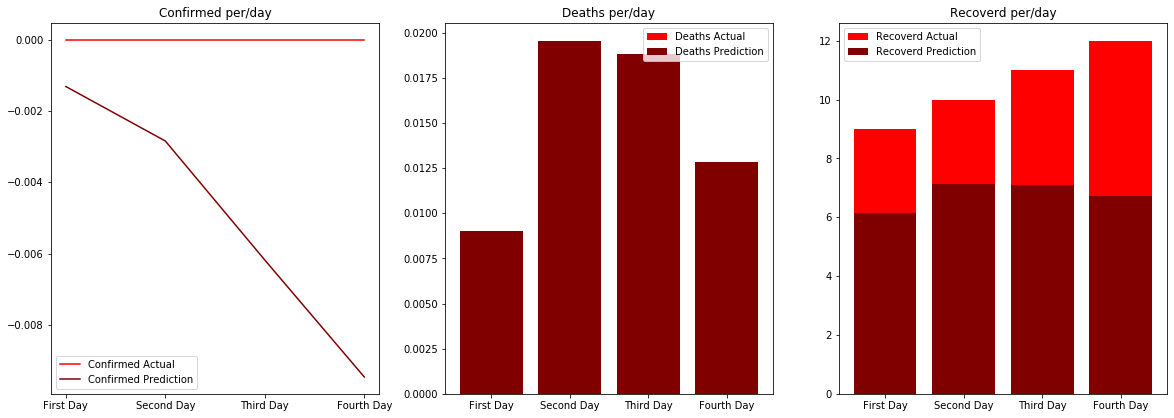

In [28]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# Seq2Seq

In [30]:
input_shape = (2, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 17 samples, validate on 5 samples
Epoch 1/100
17/17 [==============================] - 4s 237ms/step - loss: 0.0825 - acc: 0.1176 - rmse: 0.2587 - mse: 0.0825 - r_square: -0.3489 - val_loss: 0.2647 - val_acc: 0.0000e+00 - val_rmse: 0.5035 - val_mse: 0.2647 - val_r_square: -1.5865
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0796 - acc: 0.3824 - rmse: 0.2558 - mse: 0.0796 - r_square: -0.3025 - val_loss: 0.2582 - val_acc: 0.0000e+00 - val_rmse: 0.4970 - val_mse: 0.2582 - val_r_square: -1.5230
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0757 - acc: 0.4412 - rmse: 0.2499 - mse: 0.0757 - r_square: -0.2376 - val_loss: 0.2511 - val_acc: 0.0000e+00 - val_rmse: 0.4899 - val_mse: 0.2511 - val_r_square: -1.4534
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0752 - acc: 0.4412 - rmse: 0.2461 - mse: 0.0752 - r_square: -0.2305 - val_loss: 0.2435 - val_acc: 0.0000e+00 - val_rmse: 0.4822 - val_mse: 0.2435

Epoch 35/100
17/17 [==============================] - 0s 838us/step - loss: 0.0365 - acc: 0.4412 - rmse: 0.1723 - mse: 0.0365 - r_square: 0.4029 - val_loss: 0.0454 - val_acc: 0.1000 - val_rmse: 0.2002 - val_mse: 0.0454 - val_r_square: 0.5566
Epoch 36/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0271 - acc: 0.4412 - rmse: 0.1469 - mse: 0.0271 - r_square: 0.5564 - val_loss: 0.0420 - val_acc: 0.3000 - val_rmse: 0.1922 - val_mse: 0.0420 - val_r_square: 0.5894
Epoch 37/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0223 - acc: 0.4412 - rmse: 0.1306 - mse: 0.0223 - r_square: 0.6351 - val_loss: 0.0388 - val_acc: 0.4000 - val_rmse: 0.1841 - val_mse: 0.0388 - val_r_square: 0.6213
Epoch 38/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0268 - acc: 0.4412 - rmse: 0.1470 - mse: 0.0268 - r_square: 0.5610 - val_loss: 0.0357 - val_acc: 0.5000 - val_rmse: 0.1760 - val_mse: 0.0357 - val_r_square: 0.6517
Epoch 39/100
17/17 [==================

Epoch 70/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0260 - acc: 0.4853 - rmse: 0.1487 - mse: 0.0260 - r_square: 0.5754 - val_loss: 0.0235 - val_acc: 0.6000 - val_rmse: 0.1380 - val_mse: 0.0235 - val_r_square: 0.7704
Epoch 71/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0217 - acc: 0.4559 - rmse: 0.1285 - mse: 0.0217 - r_square: 0.6455 - val_loss: 0.0239 - val_acc: 0.6000 - val_rmse: 0.1394 - val_mse: 0.0239 - val_r_square: 0.7668
Epoch 72/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0233 - acc: 0.5147 - rmse: 0.1360 - mse: 0.0233 - r_square: 0.6194 - val_loss: 0.0242 - val_acc: 0.6000 - val_rmse: 0.1407 - val_mse: 0.0242 - val_r_square: 0.7632
Epoch 73/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0256 - acc: 0.4853 - rmse: 0.1404 - mse: 0.0256 - r_square: 0.5809 - val_loss: 0.0245 - val_acc: 0.6000 - val_rmse: 0.1418 - val_mse: 0.0245 - val_r_square: 0.7604
Epoch 74/100
17/17 [====================

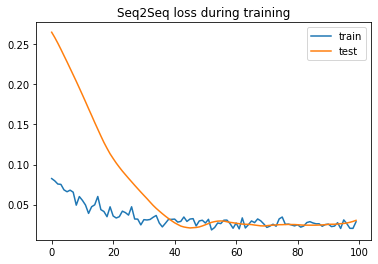

In [31]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Seq2Seq loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.01950794 MSE (0.13967081 RMSE ) , 45.58823529  ACC
Validation Score: 0.03045657 MSE (0.17451812 RMSE ) , 40.00000060  ACC


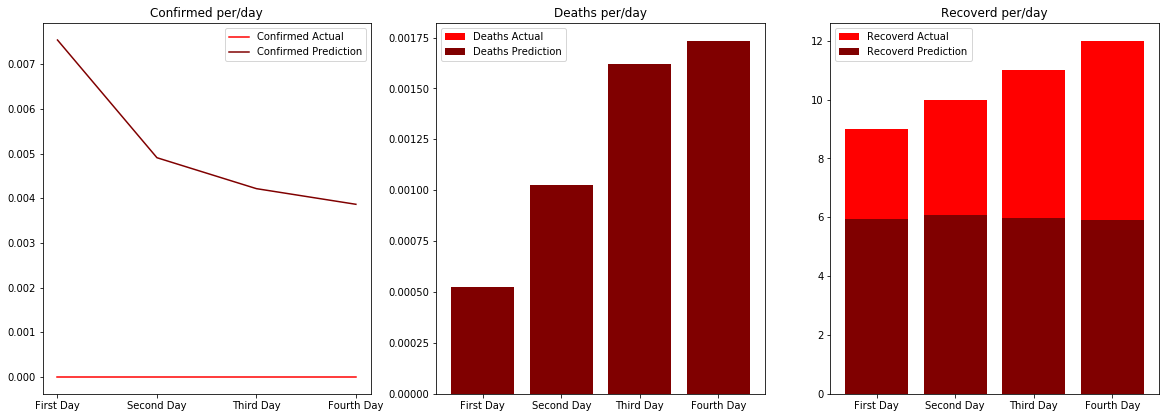

In [32]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# GRU

In [34]:
input_shape = (2, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 17 samples, validate on 5 samples
Epoch 1/100
17/17 [==============================] - 2s 121ms/step - loss: 0.0925 - acc: 0.0588 - rmse: 0.2777 - mse: 0.0925 - r_square: -0.5123 - val_loss: 0.2594 - val_acc: 0.3000 - val_rmse: 0.4976 - val_mse: 0.2594 - val_r_square: -1.5349
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0801 - acc: 0.1471 - rmse: 0.2589 - mse: 0.0801 - r_square: -0.3094 - val_loss: 0.2426 - val_acc: 0.1500 - val_rmse: 0.4812 - val_mse: 0.2426 - val_r_square: -1.3706
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0727 - acc: 0.2647 - rmse: 0.2455 - mse: 0.0727 - r_square: -0.1897 - val_loss: 0.2271 - val_acc: 0.0000e+00 - val_rmse: 0.4656 - val_mse: 0.2271 - val_r_square: -1.2192
Epoch 4/100
17/17 [==============================] - 0s 673us/step - loss: 0.0687 - acc: 0.2500 - rmse: 0.2399 - mse: 0.0687 - r_square: -0.1233 - val_loss: 0.2124 - val_acc: 0.0000e+00 - val_rmse: 0.4503 - val_mse: 0.2124 - val

Epoch 35/100
17/17 [==============================] - 0s 958us/step - loss: 0.0354 - acc: 0.6471 - rmse: 0.1688 - mse: 0.0354 - r_square: 0.4205 - val_loss: 0.0191 - val_acc: 0.6000 - val_rmse: 0.1293 - val_mse: 0.0191 - val_r_square: 0.8137
Epoch 36/100
17/17 [==============================] - 0s 625us/step - loss: 0.0334 - acc: 0.6029 - rmse: 0.1640 - mse: 0.0334 - r_square: 0.4540 - val_loss: 0.0179 - val_acc: 0.6000 - val_rmse: 0.1251 - val_mse: 0.0179 - val_r_square: 0.8249
Epoch 37/100
17/17 [==============================] - 0s 611us/step - loss: 0.0305 - acc: 0.6176 - rmse: 0.1589 - mse: 0.0305 - r_square: 0.5008 - val_loss: 0.0169 - val_acc: 0.6000 - val_rmse: 0.1213 - val_mse: 0.0169 - val_r_square: 0.8346
Epoch 38/100
17/17 [==============================] - 0s 719us/step - loss: 0.0325 - acc: 0.5735 - rmse: 0.1631 - mse: 0.0325 - r_square: 0.4681 - val_loss: 0.0162 - val_acc: 0.5500 - val_rmse: 0.1188 - val_mse: 0.0162 - val_r_square: 0.8413
Epoch 39/100
17/17 [============

Epoch 69/100
17/17 [==============================] - 0s 841us/step - loss: 0.0285 - acc: 0.5882 - rmse: 0.1499 - mse: 0.0285 - r_square: 0.5335 - val_loss: 0.0204 - val_acc: 0.5000 - val_rmse: 0.1347 - val_mse: 0.0204 - val_r_square: 0.8005
Epoch 70/100
17/17 [==============================] - 0s 923us/step - loss: 0.0277 - acc: 0.6471 - rmse: 0.1466 - mse: 0.0277 - r_square: 0.5476 - val_loss: 0.0205 - val_acc: 0.5000 - val_rmse: 0.1348 - val_mse: 0.0205 - val_r_square: 0.8002
Epoch 71/100
17/17 [==============================] - 0s 703us/step - loss: 0.0253 - acc: 0.6765 - rmse: 0.1416 - mse: 0.0253 - r_square: 0.5864 - val_loss: 0.0205 - val_acc: 0.4500 - val_rmse: 0.1349 - val_mse: 0.0205 - val_r_square: 0.7999
Epoch 72/100
17/17 [==============================] - 0s 754us/step - loss: 0.0276 - acc: 0.6029 - rmse: 0.1442 - mse: 0.0276 - r_square: 0.5488 - val_loss: 0.0205 - val_acc: 0.5000 - val_rmse: 0.1349 - val_mse: 0.0205 - val_r_square: 0.8001
Epoch 73/100
17/17 [============

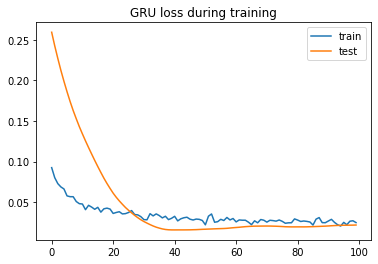

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("GRU loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.01889473 MSE (0.13745810 RMSE ) , 64.70588244  ACC
Validation Score: 0.02171891 MSE (0.14737338 RMSE ) , 40.00000000  ACC


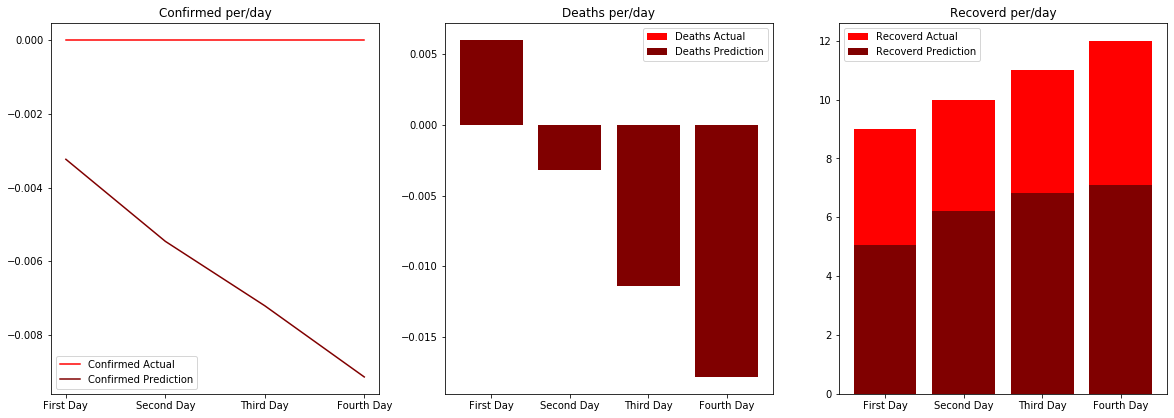

In [36]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# Only  Covid data

In [37]:
df_covid_19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Outbreak
1843,1844,02/19/2020,NaN,Iran,2020-02-19T23:43:02,2.0,2.0,0.0,2020-02-19,COVID_2019
1912,1913,02/20/2020,NaN,Iran,2020-02-20T17:33:02,5.0,2.0,0.0,2020-02-20,COVID_2019
1980,1981,02/21/2020,NaN,Iran,2020-02-21T18:53:02,18.0,4.0,0.0,2020-02-21,COVID_2019
2062,2063,02/22/2020,NaN,Iran,2020-02-22T10:03:05,28.0,5.0,0.0,2020-02-22,COVID_2019
2145,2146,02/23/2020,NaN,Iran,2020-02-23T15:13:15,43.0,8.0,0.0,2020-02-23,COVID_2019


In [38]:
df=df_covid_19
df['Province/State'] = df['Province/State'].astype('category')
df['Country/Region'] = df['Country/Region'].astype('category')
df['Outbreak'] = df['Outbreak'].astype('category')
df['Province/State'] = df['Province/State'].cat.codes
df['Country/Region'] = df['Country/Region'].cat.codes
df['Outbreak'] = df['Outbreak'].cat.codes

In [39]:
df=df[[ 'Province/State', 'Country/Region', 'Confirmed','Deaths','Recovered']]

In [49]:
def normalize_data(data, scaler, feature_len):
    minmaxscaler = scaler.fit(data)
    normalize_data = minmaxscaler.transform(data)
    return normalize_data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=2, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (22, 6, 5)
train data:  (17, 2, 5) (17, 4, 5)
validate data:  (5, 2, 5) (5, 4, 5)


In [41]:
input_shape = (2, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 17 samples, validate on 5 samples
Epoch 1/100
17/17 [==============================] - 3s 153ms/step - loss: 0.0261 - acc: 0.1765 - rmse: 0.1074 - mse: 0.0261 - r_square: -0.3288 - val_loss: 0.2707 - val_acc: 0.1500 - val_rmse: 0.5086 - val_mse: 0.2707 - val_r_square: -1.2198
Epoch 2/100
17/17 [==============================] - 0s 869us/step - loss: 0.0248 - acc: 0.3529 - rmse: 0.1038 - mse: 0.0248 - r_square: -0.2657 - val_loss: 0.2632 - val_acc: 0.2500 - val_rmse: 0.5016 - val_mse: 0.2632 - val_r_square: -1.1586
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0240 - acc: 0.3824 - rmse: 0.1012 - mse: 0.0240 - r_square: -0.2251 - val_loss: 0.2546 - val_acc: 0.2500 - val_rmse: 0.4934 - val_mse: 0.2546 - val_r_square: -1.0875
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0225 - acc: 0.3824 - rmse: 0.0977 - mse: 0.0225 - r_square: -0.1455 - val_loss: 0.2459 - val_acc: 0.4000 - val_rmse: 0.4850 - val_mse: 0.2459 - val_r_squar

Epoch 35/100
17/17 [==============================] - 0s 827us/step - loss: 0.0074 - acc: 0.3382 - rmse: 0.0749 - mse: 0.0074 - r_square: 0.6232 - val_loss: 0.0408 - val_acc: 0.6000 - val_rmse: 0.1911 - val_mse: 0.0408 - val_r_square: 0.6654
Epoch 36/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0062 - acc: 0.2794 - rmse: 0.0690 - mse: 0.0062 - r_square: 0.6817 - val_loss: 0.0388 - val_acc: 0.4500 - val_rmse: 0.1856 - val_mse: 0.0388 - val_r_square: 0.6822
Epoch 37/100
17/17 [==============================] - 0s 859us/step - loss: 0.0072 - acc: 0.3529 - rmse: 0.0718 - mse: 0.0072 - r_square: 0.6335 - val_loss: 0.0364 - val_acc: 0.4500 - val_rmse: 0.1792 - val_mse: 0.0364 - val_r_square: 0.7014
Epoch 38/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0065 - acc: 0.3235 - rmse: 0.0668 - mse: 0.0065 - r_square: 0.6675 - val_loss: 0.0338 - val_acc: 0.4500 - val_rmse: 0.1715 - val_mse: 0.0338 - val_r_square: 0.7229
Epoch 39/100
17/17 [================

17/17 [==============================] - 0s 1ms/step - loss: 0.0030 - acc: 0.3235 - rmse: 0.0413 - mse: 0.0030 - r_square: 0.8453 - val_loss: 0.0463 - val_acc: 0.3000 - val_rmse: 0.1889 - val_mse: 0.0463 - val_r_square: 0.6200
Epoch 70/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0025 - acc: 0.5294 - rmse: 0.0375 - mse: 0.0025 - r_square: 0.8721 - val_loss: 0.0461 - val_acc: 0.3000 - val_rmse: 0.1886 - val_mse: 0.0461 - val_r_square: 0.6218
Epoch 71/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0028 - acc: 0.4265 - rmse: 0.0393 - mse: 0.0028 - r_square: 0.8557 - val_loss: 0.0451 - val_acc: 0.3000 - val_rmse: 0.1867 - val_mse: 0.0451 - val_r_square: 0.6306
Epoch 72/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0026 - acc: 0.4118 - rmse: 0.0387 - mse: 0.0026 - r_square: 0.8678 - val_loss: 0.0444 - val_acc: 0.2500 - val_rmse: 0.1856 - val_mse: 0.0444 - val_r_square: 0.6358
Epoch 73/100
17/17 [==============================] -

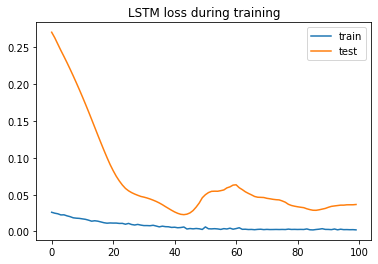

In [42]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("LSTM loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.00103442 MSE (0.03216237 RMSE ) , 47.05882318  ACC
Validation Score: 0.03664943 MSE (0.19144042 RMSE ) , 35.00000030  ACC


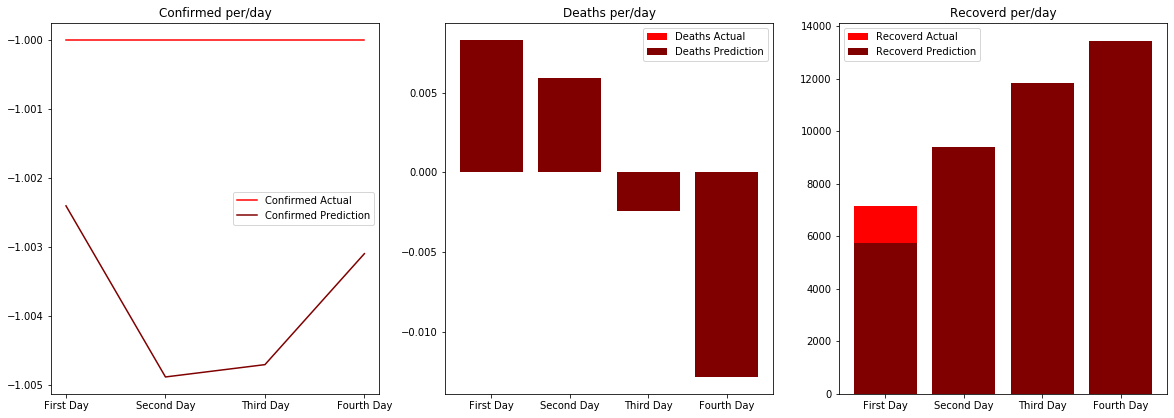

In [43]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# Seq2Seq

In [45]:
input_shape = (2, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 17 samples, validate on 5 samples
Epoch 1/100
17/17 [==============================] - 5s 300ms/step - loss: 0.0248 - acc: 0.2941 - rmse: 0.1054 - mse: 0.0248 - r_square: -0.2664 - val_loss: 0.2562 - val_acc: 0.4000 - val_rmse: 0.4940 - val_mse: 0.2562 - val_r_square: -1.1007
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0246 - acc: 0.3088 - rmse: 0.1034 - mse: 0.0246 - r_square: -0.2553 - val_loss: 0.2466 - val_acc: 0.4000 - val_rmse: 0.4843 - val_mse: 0.2466 - val_r_square: -1.0220
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0221 - acc: 0.3235 - rmse: 0.0985 - mse: 0.0221 - r_square: -0.1279 - val_loss: 0.2369 - val_acc: 0.4000 - val_rmse: 0.4743 - val_mse: 0.2369 - val_r_square: -0.9423
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0225 - acc: 0.4265 - rmse: 0.0985 - mse: 0.0225 - r_square: -0.1492 - val_loss: 0.2274 - val_acc: 0.4000 - val_rmse: 0.4644 - val_mse: 0.2274 - val_r_square:

Epoch 35/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0040 - acc: 0.4706 - rmse: 0.0578 - mse: 0.0040 - r_square: 0.7939 - val_loss: 0.0262 - val_acc: 0.4000 - val_rmse: 0.1460 - val_mse: 0.0262 - val_r_square: 0.7852
Epoch 36/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0077 - acc: 0.4559 - rmse: 0.0713 - mse: 0.0077 - r_square: 0.6075 - val_loss: 0.0257 - val_acc: 0.4000 - val_rmse: 0.1446 - val_mse: 0.0257 - val_r_square: 0.7896
Epoch 37/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0079 - acc: 0.4412 - rmse: 0.0692 - mse: 0.0079 - r_square: 0.5956 - val_loss: 0.0259 - val_acc: 0.4000 - val_rmse: 0.1455 - val_mse: 0.0259 - val_r_square: 0.7879
Epoch 38/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0035 - acc: 0.4706 - rmse: 0.0519 - mse: 0.0035 - r_square: 0.8232 - val_loss: 0.0259 - val_acc: 0.4000 - val_rmse: 0.1458 - val_mse: 0.0259 - val_r_square: 0.7878
Epoch 39/100
17/17 [====================

Epoch 70/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0048 - acc: 0.4706 - rmse: 0.0530 - mse: 0.0048 - r_square: 0.7537 - val_loss: 0.0140 - val_acc: 0.3000 - val_rmse: 0.1069 - val_mse: 0.0140 - val_r_square: 0.8854
Epoch 71/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0024 - acc: 0.4265 - rmse: 0.0432 - mse: 0.0024 - r_square: 0.8752 - val_loss: 0.0144 - val_acc: 0.2000 - val_rmse: 0.1087 - val_mse: 0.0144 - val_r_square: 0.8821
Epoch 72/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0047 - acc: 0.4559 - rmse: 0.0532 - mse: 0.0047 - r_square: 0.7614 - val_loss: 0.0149 - val_acc: 0.2000 - val_rmse: 0.1109 - val_mse: 0.0149 - val_r_square: 0.8778
Epoch 73/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0102 - acc: 0.4118 - rmse: 0.0655 - mse: 0.0102 - r_square: 0.4794 - val_loss: 0.0149 - val_acc: 0.3000 - val_rmse: 0.1109 - val_mse: 0.0149 - val_r_square: 0.8777
Epoch 74/100
17/17 [====================

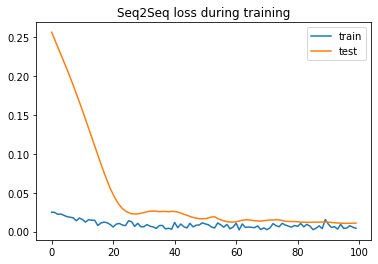

In [47]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Seq2Seq loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.00213783 MSE (0.04623671 RMSE ) , 44.11764706  ACC
Validation Score: 0.01087868 MSE (0.10430090 RMSE ) , 25.00000000  ACC


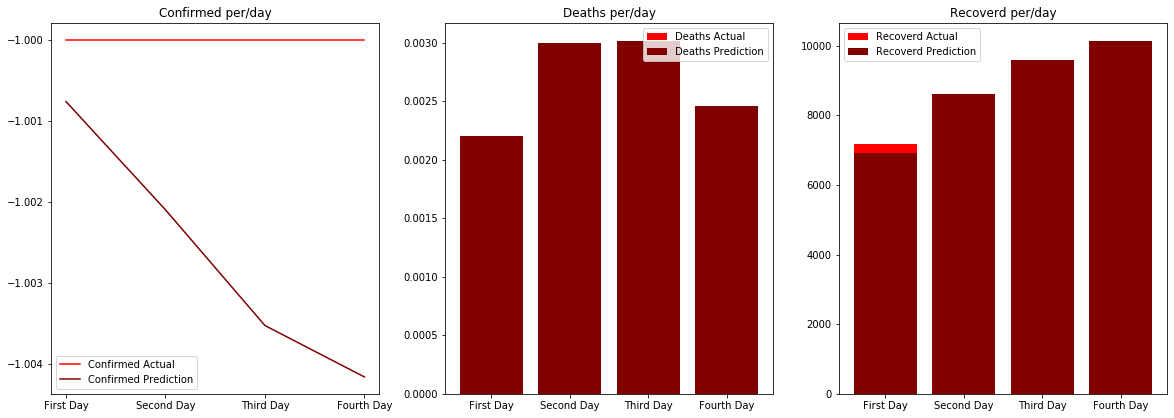

In [48]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# GRU

In [50]:
input_shape = (2, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 17 samples, validate on 5 samples
Epoch 1/100
17/17 [==============================] - 3s 194ms/step - loss: 0.0268 - acc: 0.2647 - rmse: 0.1080 - mse: 0.0268 - r_square: -0.3654 - val_loss: 0.2649 - val_acc: 0.6000 - val_rmse: 0.5029 - val_mse: 0.2649 - val_r_square: -1.1723
Epoch 2/100
17/17 [==============================] - 0s 887us/step - loss: 0.0258 - acc: 0.3971 - rmse: 0.1039 - mse: 0.0258 - r_square: -0.3151 - val_loss: 0.2408 - val_acc: 0.6000 - val_rmse: 0.4796 - val_mse: 0.2408 - val_r_square: -0.9748
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0237 - acc: 0.3676 - rmse: 0.0986 - mse: 0.0237 - r_square: -0.2104 - val_loss: 0.2182 - val_acc: 0.4500 - val_rmse: 0.4566 - val_mse: 0.2182 - val_r_square: -0.7891
Epoch 4/100
17/17 [==============================] - 0s 754us/step - loss: 0.0211 - acc: 0.3676 - rmse: 0.0941 - mse: 0.0211 - r_square: -0.0747 - val_loss: 0.1970 - val_acc: 0.4000 - val_rmse: 0.4340 - val_mse: 0.1970 - val_r_squ

Epoch 35/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0033 - acc: 0.3676 - rmse: 0.0454 - mse: 0.0033 - r_square: 0.8301 - val_loss: 0.0204 - val_acc: 0.4000 - val_rmse: 0.1305 - val_mse: 0.0204 - val_r_square: 0.8323
Epoch 36/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0036 - acc: 0.3824 - rmse: 0.0453 - mse: 0.0036 - r_square: 0.8174 - val_loss: 0.0239 - val_acc: 0.4000 - val_rmse: 0.1409 - val_mse: 0.0239 - val_r_square: 0.8037
Epoch 37/100
17/17 [==============================] - 0s 845us/step - loss: 0.0033 - acc: 0.4559 - rmse: 0.0437 - mse: 0.0033 - r_square: 0.8342 - val_loss: 0.0282 - val_acc: 0.4000 - val_rmse: 0.1519 - val_mse: 0.0282 - val_r_square: 0.7691
Epoch 38/100
17/17 [==============================] - 0s 982us/step - loss: 0.0042 - acc: 0.3676 - rmse: 0.0470 - mse: 0.0042 - r_square: 0.7863 - val_loss: 0.0328 - val_acc: 0.4000 - val_rmse: 0.1629 - val_mse: 0.0328 - val_r_square: 0.7309
Epoch 39/100
17/17 [================

Epoch 69/100
17/17 [==============================] - 0s 886us/step - loss: 0.0025 - acc: 0.4265 - rmse: 0.0386 - mse: 0.0025 - r_square: 0.8722 - val_loss: 0.0258 - val_acc: 0.3500 - val_rmse: 0.1453 - val_mse: 0.0258 - val_r_square: 0.7883
Epoch 70/100
17/17 [==============================] - 0s 786us/step - loss: 0.0021 - acc: 0.5000 - rmse: 0.0349 - mse: 0.0021 - r_square: 0.8911 - val_loss: 0.0253 - val_acc: 0.3500 - val_rmse: 0.1439 - val_mse: 0.0253 - val_r_square: 0.7929
Epoch 71/100
17/17 [==============================] - 0s 757us/step - loss: 0.0025 - acc: 0.5294 - rmse: 0.0365 - mse: 0.0025 - r_square: 0.8701 - val_loss: 0.0249 - val_acc: 0.3500 - val_rmse: 0.1430 - val_mse: 0.0249 - val_r_square: 0.7955
Epoch 72/100
17/17 [==============================] - 0s 835us/step - loss: 0.0023 - acc: 0.5294 - rmse: 0.0371 - mse: 0.0023 - r_square: 0.8813 - val_loss: 0.0249 - val_acc: 0.3500 - val_rmse: 0.1428 - val_mse: 0.0249 - val_r_square: 0.7960
Epoch 73/100
17/17 [============

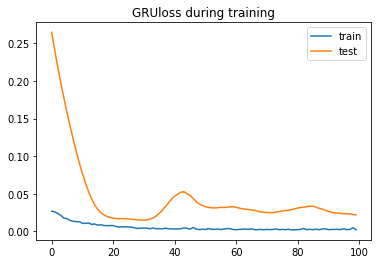

In [52]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("GRUloss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.00101671 MSE (0.03188588 RMSE ) , 54.41176471  ACC
Validation Score: 0.02207507 MSE (0.14857681 RMSE ) , 35.00000000  ACC


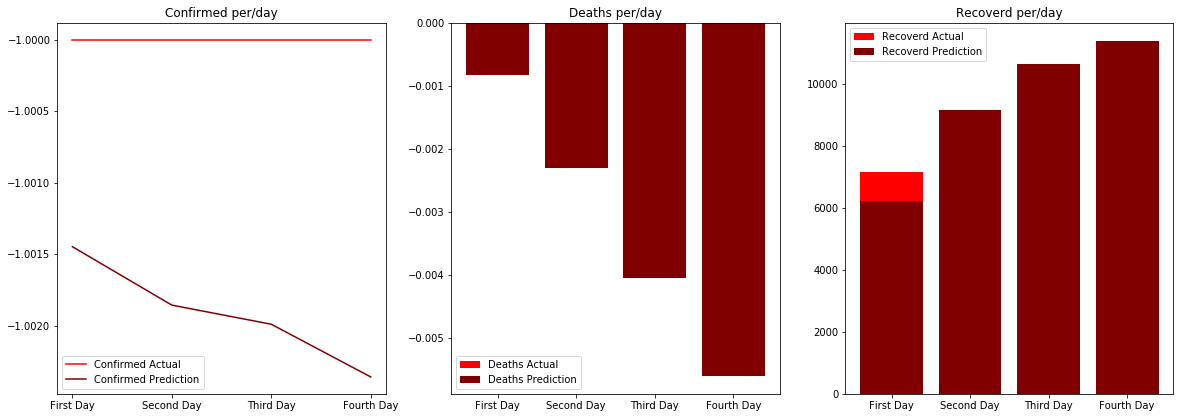

In [53]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()